In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
var1 = pd.read_csv("/Users/tarunmamidi/Documents/Development/DITTO-1/data/DITTO_scores_test_1_transcript_variants.csv")
print(var1.shape)
var1.head()

(37027, 257)


,transcript,gene,consequence,protein_hgvs,cdna_hgvs,chrom,pos,ref_base,alt_base,clingen.disease,...,mutationtaster.prediction_Polymorphism,mutationtaster.model_complex_aae,mutationtaster.model_simple_aae,mutationtaster.model_without_aae,prec.stat_lof-tolerant,prec.stat_recessive,sift.confidence_High,sift.confidence_Low,class,spliceai
0,ENST00000328333,COL7A1,missense_variant,p.Gly2037Glu,c.6110G>A,chr3,48575409,C,T,NaN,...,0,0,1,0,0,0,1,0,1,0.0004
1,ENST00000558518,LDLR,stop_gained,p.Gln448Ter,c.1342C>T,chr19,11113433,C,T,NaN,...,0,1,0,0,0,0,0,0,1,0.0004
2,ENST00000393994,BBS1,stop_gained,p.Arg264Ter,c.790C>T,chr11,66526189,C,T,NaN,...,1,0,0,1,0,0,0,0,1,0.0004
3,ENST00000455727,LDLR,missense_variant,p.Trp275Arg,c.823T>C,chr19,11113418,T,C,NaN,...,0,0,1,0,0,0,1,0,1,0.0004
4,ENST00000278616,ATM,stop_gained,p.Ser712Ter,c.2135C>G,chr11,108256225,C,G,hereditary nonpolyposis colon cancer;hereditar...,...,0,1,0,0,0,1,0,0,1,0.0004


In [3]:
var1.columns.to_list()

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'clingen.disease',
 'clingen.classification',
 'ncbigene.entrez',
 'omim.omim_id',
 'uniprot.acc',
 'dbsnp.rsid',
 'DITTO',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'cadd.phred',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.molecular_profile_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cancer_genome_interpreter.resistant',
 'cancer_genome_interpreter.responsive',
 'clinpred.score',
 'dann.score',
 'dann_coding.dann_coding_score',
 'dgi.score',
 'ess_gene.indispensability_score',
 'exac_gene.exac_pli',
 'exac_gene.exac_pnull',
 'exac_gene.exac_del_score',
 'exac_gene.exac_dup_score',
 'exac_gene.exac_cnv_score',
 'fathmm.fathmm_score',
 'fathmm_xf_coding.fathmm_xf_coding_score',
 'funseq2.score',
 'gerp.gerp_rs',
 'ghis.ghis',
 'gwas_catalog.pval',
 'genehancer.score',
 'linsight.value',
 'lrt.lrt_score',
 'lrt.lrt_ome

<Axes: >

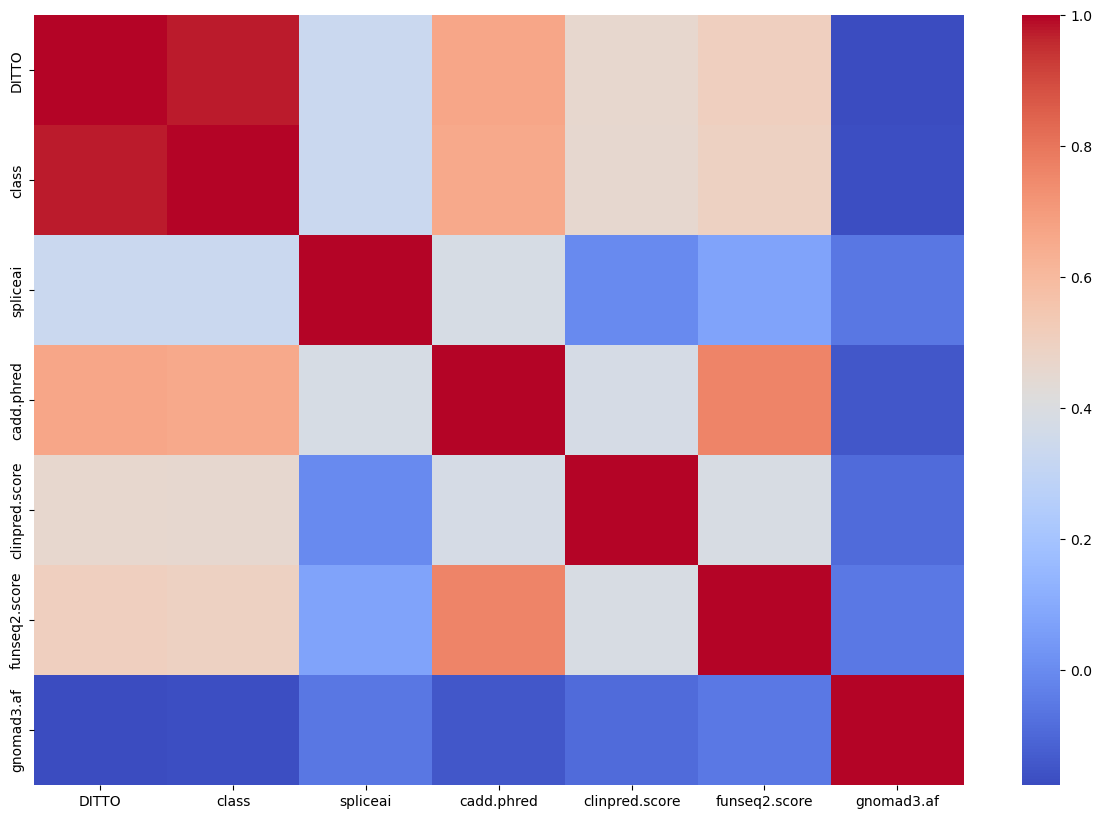

In [8]:
fig = plt.figure(figsize=(15, 10))
corr_matrix = var1[['DITTO','class','spliceai','cadd.phred','clinpred.score','funseq2.score','gnomad3.af']].corr()
sns.heatmap(corr_matrix, fmt=".2g", cmap="coolwarm")

In [10]:
import numpy as np
# Create correlation matrix
corr_matrix_abs = corr_matrix.abs()
print(corr_matrix_abs)

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(
            np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool)
        )
print(upper)

                   DITTO     class  spliceai  cadd.phred  clinpred.score   
DITTO           1.000000  0.976590  0.333265    0.668904        0.461823  \
class           0.976590  1.000000  0.333948    0.658405        0.455728   
spliceai        0.333265  0.333948  1.000000    0.384245        0.004299   
cadd.phred      0.668904  0.658405  0.384245    1.000000        0.378121   
clinpred.score  0.461823  0.455728  0.004299    0.378121        1.000000   
funseq2.score   0.505611  0.495403  0.073428    0.764506        0.386844   
gnomad3.af      0.175518  0.170156  0.060517    0.147083        0.089428   

                funseq2.score  gnomad3.af  
DITTO                0.505611    0.175518  
class                0.495403    0.170156  
spliceai             0.073428    0.060517  
cadd.phred           0.764506    0.147083  
clinpred.score       0.386844    0.089428  
funseq2.score        1.000000    0.052070  
gnomad3.af           0.052070    1.000000  
                DITTO    class  splicea

In [11]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
print(
            f"Correlated columns to be dropped: {to_drop}"
        )


1
Correlated columns to be dropped: ['class']


In [36]:
# Read the Excel file
data = pd.read_excel('../../data/var_num_train_test.xlsx')
print(data.shape)
# data.fillna(0, inplace=True)
data.head()

(24, 5)


,consequence,train_high,train_low,test_high,test_low
0,missense variant,32714.0,41669.0,10991.0,13941.0
1,stop gained,28119.0,297.0,9331.0,91.0
2,splice site variant,15790.0,243.0,5336.0,67.0
3,frameshift truncation,14658.0,231.0,4793.0,75.0
4,frameshift elongation,7818.0,175.0,2598.0,74.0


In [37]:
for index, row in data.iterrows():
    Observed_Values = {'Train':[row['train_high'],row['train_low']],
                   'Test':[row['test_high'],row['test_low']]}
    df = pd.DataFrame(Observed_Values)
    val=stats.chi2_contingency(df, correction=True)
    data.loc[index,'statistic']=round(val.statistic,2)
    data.loc[index,'p-value']=round(val.pvalue,2)
    #print(index,df)

In [35]:
data

,consequence,train_high,train_low,test_high,test_low,statistic,p-value
0,missense variant,32714.0,41669.0,10991.0,13941.0,0.08,0.78
1,stop gained,28119.0,297.0,9331.0,91.0,0.36,0.55
2,splice site variant,15790.0,243.0,5336.0,67.0,1.96,0.16
3,frameshift truncation,14658.0,231.0,4793.0,75.0,0.00,1.00
4,frameshift elongation,7818.0,175.0,2598.0,74.0,2.71,0.10
5,intron variant,2543.0,160229.0,873.0,53672.0,0.36,0.55
6,inframe deletion,956.0,703.0,295.0,242.0,1.09,0.30
7,start lost,888.0,54.0,276.0,12.0,0.78,0.38
8,synonymous variant,502.0,214433.0,181.0,71265.0,0.80,0.37
9,inframe insertion,318.0,464.0,112.0,138.0,1.17,0.28


In [29]:
data.to_csv('../../data/var_num_train_test_chi2.csv',index=False)

In [13]:
data = {
    'Train': [100, 50],
    'Test': [0, 70]
}

df = pd.DataFrame(data)
print(df)

chi2_statistic, pval, expected_frequency, observed_frequency = stats.chi2_contingency(df, correction=True)

print("Chi-square statistic:", chi2_statistic)
print("p-value:", pval)

# Assuming p-value > 0.05 (not significant)
if pval > 0.05:
  print("The chi-square test shows no statistically significant difference between consequence type distribution in train and test sets (p > 0.05).")
else:
  print("The chi-square test shows a statistically significant difference between consequence type distribution in train and test sets (p < 0.05).")


   Train  Test
0    100     0
1     50    70
Chi-square statistic: 82.88779365079365
p-value: 8.68458124898747e-20
The chi-square test shows a statistically significant difference between consequence type distribution in train and test sets (p < 0.05).
